In [1]:
import sqlite3
import pandas as pd
import matplotlib.dates as dates
from datetime import datetime as dt
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

In [2]:
conn = sqlite3.connect('../data/netflix-data-aggregated.db')
df = pd.read_sql_query('select * from v6_pref_probe_hour', con=conn)
conn.close()

In [3]:
df

,unit_id,local_hour,v6_pref
0,62712,0,1.0
1,62712,1,1.0
2,62712,2,1.0
3,62712,3,1.0
4,62712,4,1.0
...,...,...,...
2148,950240,19,1.0
2149,950240,20,1.0
2150,950240,21,1.0
2151,950240,22,1.0


In [4]:
df['v6_pref'] = df['v6_pref']*100 

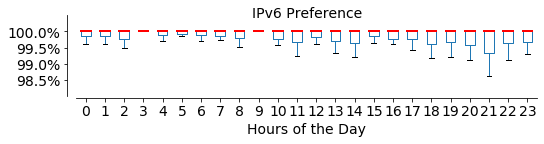

In [5]:
fig = plt.figure(figsize = (8, 1.5))
plt.rcParams['font.size'] = 14
ax = plt.gca()

ipv6=df.boxplot(column=['v6_pref'],  ax = ax, by = ['local_hour'], sym = "", medianprops = { 'linewidth' : 2.0 }, return_type = 'dict')

for key in ipv6.keys():
    for item in ipv6[key]['medians']:
        item.set_color('red')

ax.grid(False)
ax.set_xlabel('Hours of the Day', fontsize=14)
ax.set_ylabel('', fontsize=12)
ax.set_yscale('linear')
ax.set_ylim([98, 100.5])

yticks = np.arange(98.5,100.5,0.5)
ax.set_yticks(yticks)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.02))
ax.spines['left'].set_position(('axes', -0.02))

ax.set_title('', fontsize=1, y=1.05)

def to_percent(y, position): return str(y) + '%'
ax.yaxis.set_major_formatter(FuncFormatter(to_percent))

fig.suptitle('IPv6 Preference',  fontsize=14)
plt.savefig('../plots/he-preference-hourly.pdf', format='pdf', bbox_inches='tight')
plt.show()